In [3]:
#import standard libraries
import pandas as pd
import numpy as np
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import style 

# Check scikit-learn version
import sklearn
#import the kmeans algorithm
from sklearn.cluster import KMeans
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
# This is the version that will be used
print(sklearn.__version__)

#import functions from the tutorial
from functions import *

0.23.1


In [5]:
import pandas as pd
df=pd.read_csv('Resources/Data/scaled_data.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
df.corr().style.background_gradient()

/Users/siaraleininger/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/siaraleininger/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,Life_Expectancy (LED),Adult_Mortality,infantdeaths,GDP_Health_Gov_Expenditure (%),HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
Happiness_Score,1.000000,0.775445,0.764109,0.771219,0.592499,0.065331,-0.419593,nan,0.538061,0.341646,0.536227,0.489242,0.742036,-0.569297,-0.246324,-0.080572,0.223995,-0.165692,0.464924,-0.253973,0.399783,0.362245,-0.475136,0.455381,-0.006814,-0.558550,-0.544194,0.761802,0.701895
GDP,0.775445,1.000000,0.782250,0.851443,0.423071,-0.122246,-0.335573,nan,0.546706,0.395111,0.547392,0.526634,0.824718,-0.624344,-0.205920,-0.010646,0.283664,-0.070264,0.579350,-0.223760,0.489651,0.416380,-0.430658,0.487710,0.018256,-0.499835,-0.494329,0.897898,0.793026
Social_Support,0.764109,0.782250,1.000000,0.746707,0.482677,-0.054286,-0.212337,nan,0.558448,0.459249,0.452101,0.518413,0.719766,-0.515775,-0.285906,-0.128867,0.256557,-0.134792,0.490300,-0.294968,0.411815,0.367047,-0.379339,0.396696,-0.005451,-0.565577,-0.551332,0.775145,0.699281
Life_Expectancy (Happiness),0.771219,0.851443,0.746707,1.000000,0.453230,-0.073388,-0.354834,nan,0.472122,0.402451,0.540932,0.460289,0.945392,-0.769190,-0.264703,0.027118,0.385094,-0.076902,0.529175,-0.292047,0.532040,0.494070,-0.620344,0.452783,-0.064756,-0.546692,-0.542649,0.862449,0.790146
Freedom_Score,0.592499,0.423071,0.482677,0.453230,1.000000,0.251895,-0.421152,nan,0.254851,0.090193,0.234728,0.197718,0.404540,-0.216020,-0.003773,-0.049933,0.189746,0.081127,0.095647,-0.016197,0.275055,0.289519,-0.206215,0.271877,0.007127,-0.244938,-0.222294,0.418739,0.369642
Generosity,0.065331,-0.122246,-0.054286,-0.073388,0.251895,1.000000,-0.276100,nan,-0.251523,-0.131114,-0.072209,-0.173405,-0.110892,0.023829,0.086731,-0.022373,-0.011258,0.073776,-0.160737,0.089885,-0.139478,-0.018542,-0.016582,0.079798,0.211263,0.135642,0.129272,-0.147918,-0.138848
Corruption_Score,-0.419593,-0.335573,-0.212337,-0.354834,-0.421152,-0.276100,1.000000,nan,-0.141854,0.042956,-0.328477,-0.208367,-0.314497,0.247546,0.082104,0.092506,-0.127693,0.068507,-0.218117,0.087555,-0.220425,-0.186334,0.149487,-0.343396,0.064316,0.183507,0.182640,-0.321081,-0.319420
Happiness (Dystopia),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Beer_Servings,0.538061,0.546706,0.558448,0.472122,0.254851,-0.251523,-0.141854,nan,1.000000,0.474127,0.546176,0.833575,0.474494,-0.228156,-0.213633,-0.034896,0.009203,-0.143041,0.331914,-0.220184,0.258505,0.133119,-0.131182,0.332001,-0.055168,-0.499008,-0.495869,0.574425,0.599165
Spirit_Servings,0.341646,0.395111,0.459249,0.402451,0.090193,-0.131114,0.042956,nan,0.474127,1.000000,0.232426,0.635453,0.385029,-0.270927,-0.123839,0.038891,-0.005048,0.050817,0.340107,-0.141172,0.238345,0.063307,-0.295087,0.130578,-0.144158,-0.426575,-0.394778,0.444423,0.404055


In [9]:
columns_int=['GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Population', 'thinness1-19years',
       'Schooling']
X=df[columns_int[:22]].dropna()
len(X)

155

In [10]:
X

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,...,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling
0,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,0.694444,...,0.817223,0.000022,0.869748,0.000000,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333
1,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,0.722222,...,0.817223,0.000100,0.823529,0.000000,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176
2,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,0.708333,...,0.817223,0.000387,0.803922,0.000000,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314
3,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,0.458333,...,0.817223,0.000000,0.854342,0.000000,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373
4,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,0.465278,...,0.817223,0.000155,0.857143,0.000000,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.578582,0.327762,0.588507,0.657315,0.146987,0.953207,0.045213,0.005362,0.002703,0.125000,...,0.474747,0.001660,0.317927,0.019091,0.474747,0.474747,0.473118,0.000176,0.307116,0.348039
151,0.663725,0.554891,0.795510,0.923683,0.098961,0.196178,0.114362,0.005362,0.000000,0.472222,...,0.989899,0.000011,0.299720,0.013636,1.000000,0.989899,0.043011,0.045047,0.213483,0.529412
152,0.686921,0.782925,0.724140,0.729702,-0.128533,0.866022,0.170213,0.048257,0.010811,0.326389,...,0.878788,0.000000,0.445378,0.029091,0.888889,0.878788,0.666667,0.061115,0.209738,0.504902
153,0.648464,0.568097,0.664023,0.462887,0.029462,0.815978,0.300496,0.208662,0.148503,0.347410,...,0.313131,0.009714,0.592418,0.035455,0.414141,0.313131,0.365591,0.046026,0.168281,0.240196


Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Population',
       'thinness1-19years', 'Schooling'],
      dtype='object')
2 clusters: 0.24649211631834236
2 clusters: -90.26405600304506


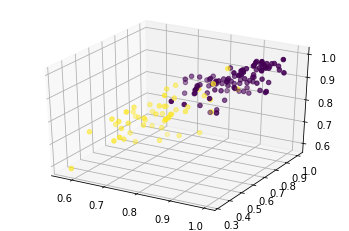

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Population',
       'thinness1-19years', 'Schooling'],
      dtype='object')
3 clusters: 0.22391411450609475
3 clusters: -75.56134780683723


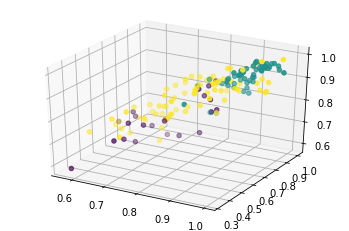

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Population',
       'thinness1-19years', 'Schooling'],
      dtype='object')
4 clusters: 0.19803450808701645
4 clusters: -66.20733371648194


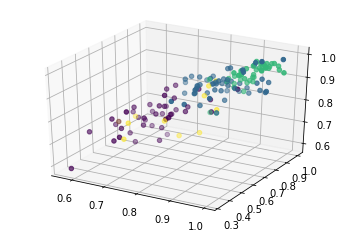

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Adult_Mortality',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Population',
       'thinness1-19years', 'Schooling'],
      dtype='object')
5 clusters: 0.20118134713247765
5 clusters: -60.33930251553035


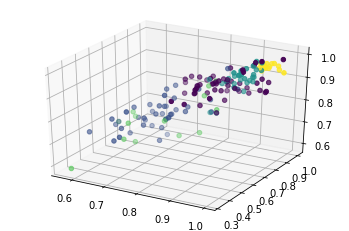

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

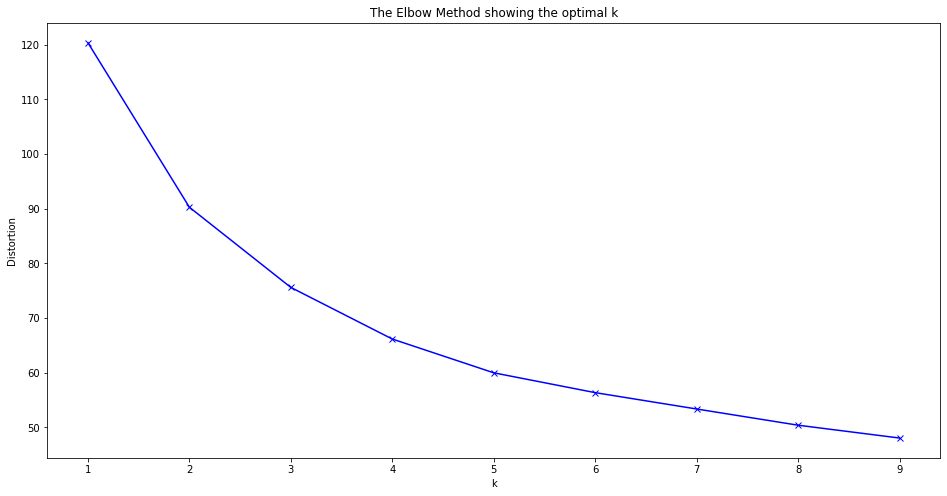

In [12]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
#Skipped the steps scaling & cleaning the data as we already performed this
#First using 2 clusters based on the elbow method done above. Will run 3 after.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(X)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(X)

In [14]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(X, columns=X.columns, index = X.index)
happy_clustered['cluster'] = clusters

happy_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,...,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling,cluster
0,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,0.694444,...,0.000022,0.869748,0.0,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333,1
1,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,0.722222,...,0.000100,0.823529,0.0,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176,1
2,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,0.708333,...,0.000387,0.803922,0.0,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314,1
3,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,0.458333,...,0.000000,0.854342,0.0,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373,1
4,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,0.465278,...,0.000155,0.857143,0.0,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647,1


In [15]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(X)

In [16]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = X.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
0,-0.805530,0.153608,1
1,-0.825167,0.145281,1
2,-0.783253,0.075252,1
3,-0.591868,-0.042872,1
4,-0.631660,-0.098394,1


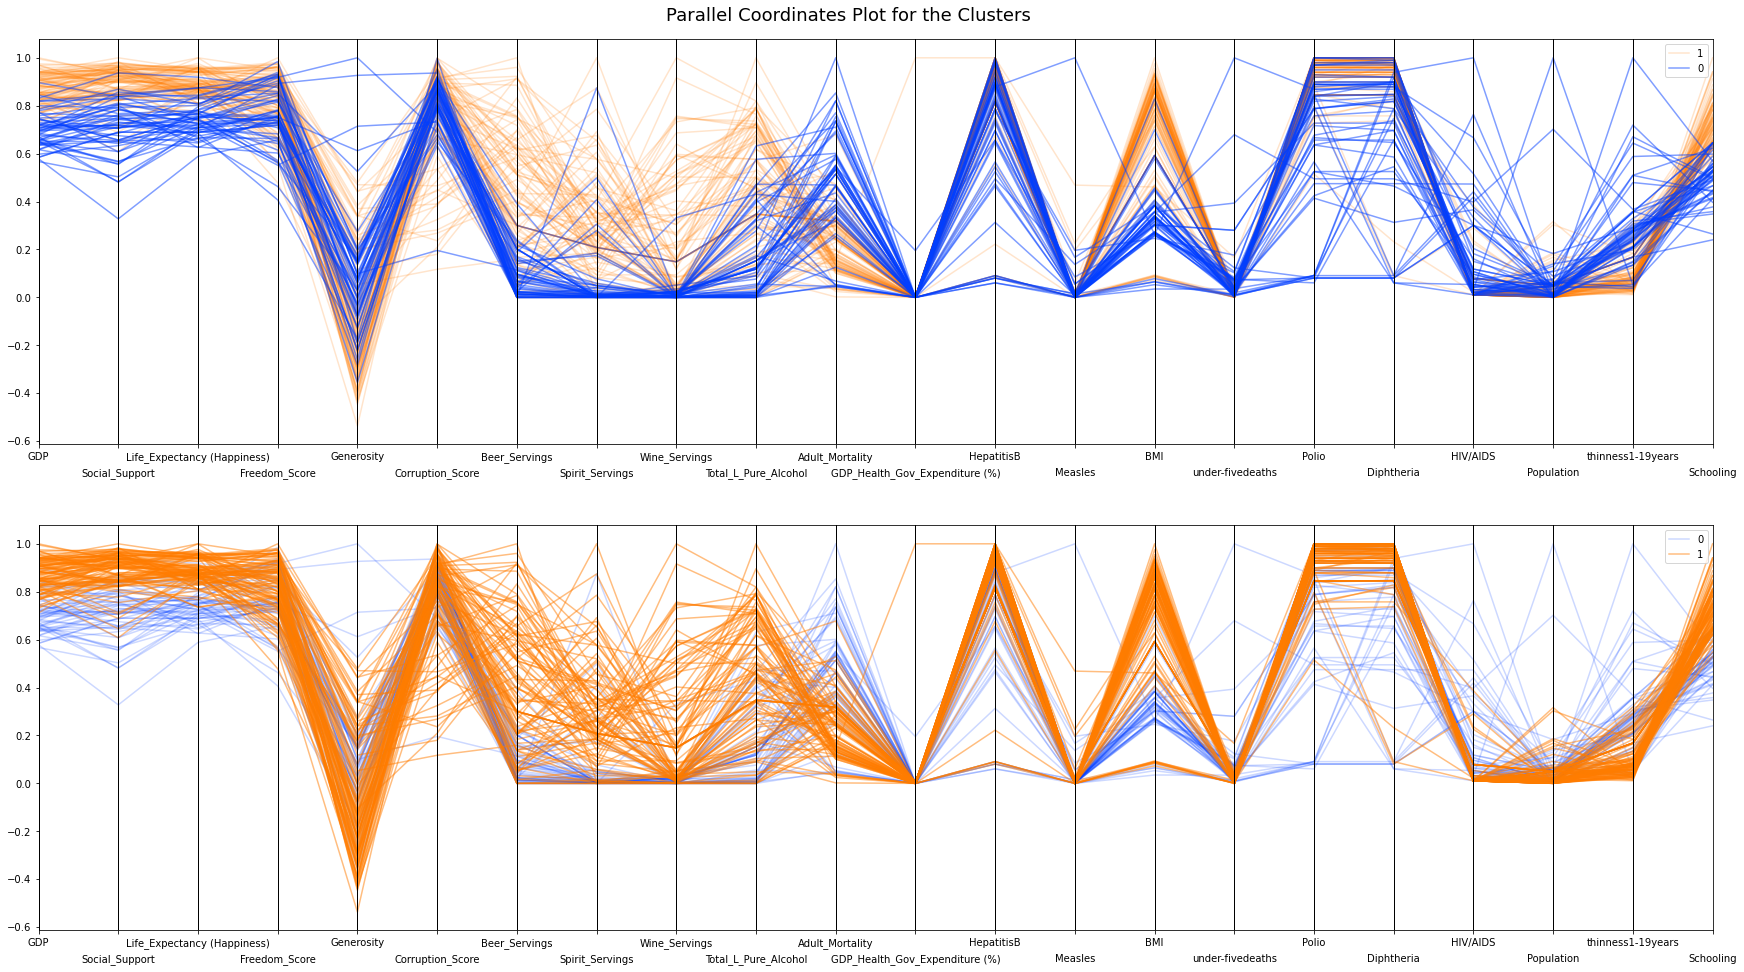

In [17]:
display_parallel_coordinates(happy_clustered, 2)

In [20]:
#Now using 3 clusters.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(X)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(X)

In [21]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(X, columns=X.columns, index = X.index)
happy_clustered['cluster'] = clusters

happy_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,...,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling,cluster
0,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,0.694444,...,0.000022,0.869748,0.0,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333,1
1,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,0.722222,...,0.000100,0.823529,0.0,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176,1
2,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,0.708333,...,0.000387,0.803922,0.0,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314,1
3,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,0.458333,...,0.000000,0.854342,0.0,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373,1
4,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,0.465278,...,0.000155,0.857143,0.0,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647,1


In [22]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(X)

In [23]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(X, index = X.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
0,NaN,NaN,1
1,NaN,NaN,1
2,NaN,NaN,1
3,NaN,NaN,1
4,NaN,NaN,1
